In [74]:
import pandas as pd

df = pd.read_csv("humans/test_responses_humans_CH.csv")
test_responses_llm_df = pd.read_csv("C:/Users/pedro/Downloads/TRI/test_responses_llms/tests_responses_llms.csv")

df = test_responses_llm_df


df = df[df['CO_PROVA'] == 1062]

df.head()

,MODEL_NAME,MODEL_SIZE,BITS,TEMPERATURE,PROMPT_SEQ,ANSWER_ORDER,QUESTION_TEMPLATE_SEQ,CTT_SCORE,CO_PROVA,TX_RESPOSTAS,TX_GABARITO,RESPONSE_PATTERN,TOTAL_RUN_TIME_SEC,AVG_RUN_TIME_PER_ITEM_SEC
0,mistral,7,4,0.100,2,EDCBA,0,30,1062,CBECABDCDAACAAEDAAADBADDADCBCCAAABDBAAEDBAAAB,CBECABBCDEACDCEDAAADBCDDAECBABAECBEBAEEDADEAB,111111011011001111111011101100100101101100011,79.821174,1.773804
1,mistral,7,4,0.010,1,EDCBA,0,25,1062,AAECACDCDAACAAEDAAADBADAADCACAAECBDCAAECBAAAB,CBECABBCDEACDCEDAAADBCDDAECBABAECBEBAEEDADEAB,001110011011001111111010101000111100101000011,79.259617,1.761325
2,mistral,7,4,0.001,0,EDCBA,0,23,1062,CAECACDADAACAAEDAAADBADAADCACAAAABDCAAECBAAAB,CBECABBCDEACDCEDAAADBCDDAECBABAECBEBAEEDADEAB,101110001011001111111010101000100100101000011,86.185284,1.915229
3,mistral,7,4,0.990,1,EDCBA,0,22,1062,CAECACECBCAEAAEBAAAEDABDABCBCCAECDAEAAEDAAAAC,CBECABBCDEACDCEDAAADBCDDAECBABAECBEBAEEDADEAB,101110010010001011100001101100111000101110010,96.741706,2.149816
4,mistral,7,4,0.500,0,EABCD,0,20,1062,DBACABDCDBEDDDADADDDBDDDBDCDADEACBDDBDADBDAEB,CBECABBCDEACDCEDAAADBCDDAECBABAECBEBAEEDADEAB,010111011000100110011011001010001100000101001,79.513091,1.766958


In [75]:
import pandas as pd

# Suponha que seu DataFrame seja chamado df
# e tenha uma coluna chamada RESPONSE_PATTERN

# Criar um DataFrame de exemplo
data = {'RESPONSE_PATTERN': ['111000', '101010', '110011']}
#df = pd.DataFrame(data)

# Calcular a taxa de acerto para cada questão
acerto_por_questao = df['RESPONSE_PATTERN'].apply(lambda x: list(map(int, list(x))))

# Exibir os resultados
acerto_por_questao

# Use a função zip para agrupar os elementos correspondentes das listas
elementos_agrupados = zip(*acerto_por_questao)

# Calcule a média para cada grupo de elementos
medias_por_posicao = [sum(valores) / len(valores) for valores in elementos_agrupados]

medias_por_posicao


[0.1694915254237288,
 0.23728813559322035,
 0.23728813559322035,
 0.2542372881355932,
 0.3389830508474576,
 0.1864406779661017,
 0.3559322033898305,
 0.15254237288135594,
 0.3050847457627119,
 0.23728813559322035,
 0.3389830508474576,
 0.2033898305084746,
 0.13559322033898305,
 0.1864406779661017,
 0.2542372881355932,
 0.288135593220339,
 0.3389830508474576,
 0.3559322033898305,
 0.3559322033898305,
 0.22033898305084745,
 0.3728813559322034,
 0.13559322033898305,
 0.3728813559322034,
 0.3728813559322034,
 0.3220338983050847,
 0.13559322033898305,
 0.3050847457627119,
 0.1864406779661017,
 0.423728813559322,
 0.01694915254237288,
 0.3220338983050847,
 0.13559322033898305,
 0.2711864406779661,
 0.3559322033898305,
 0.1694915254237288,
 0.13559322033898305,
 0.288135593220339,
 0.22033898305084745,
 0.2542372881355932,
 0.22033898305084745,
 0.13559322033898305,
 0.1694915254237288,
 0.23728813559322035,
 0.3389830508474576,
 0.3050847457627119]

In [76]:
itens = pd.read_csv("../microdados_enem_2022/DADOS/ITENS_PROVA_2022.csv",  sep=";",  encoding='latin')

filtered_itens = itens[itens['CO_PROVA'] == 1062].sort_values(by='CO_POSICAO') 
filtered_itens['CORRECT_RATE'] = medias_por_posicao
filtered_itens.head()

,CO_POSICAO,SG_AREA,CO_ITEM,TX_GABARITO,CO_HABILIDADE,IN_ITEM_ABAN,TX_MOTIVO_ABAN,NU_PARAM_A,NU_PARAM_B,NU_PARAM_C,TX_COR,CO_PROVA,TP_LINGUA,IN_ITEM_ADAPTADO,CORRECT_RATE
315,46,CH,96291,C,1,0,NaN,2.90370,1.66082,0.10307,LARANJA,1062,NaN,1,0.169492
359,47,CH,140572,B,19,0,NaN,2.46583,0.73772,0.17053,LARANJA,1062,NaN,1,0.237288
358,48,CH,96516,E,2,0,NaN,1.96743,2.20588,0.08863,LARANJA,1062,NaN,1,0.237288
357,49,CH,140190,C,5,0,NaN,1.94428,0.27387,0.14788,LARANJA,1062,NaN,1,0.254237
356,50,CH,111984,A,3,0,NaN,1.90716,1.36087,0.22521,LARANJA,1062,NaN,1,0.338983


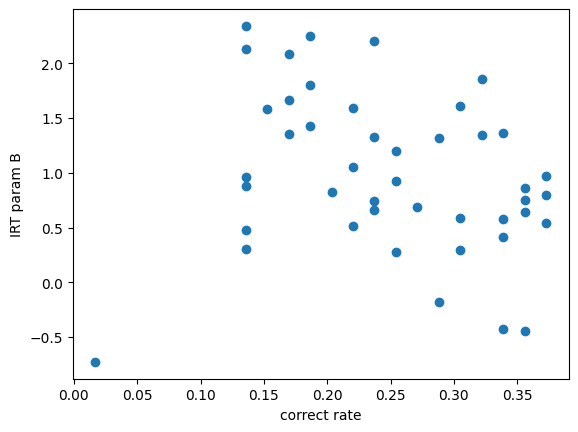

In [77]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot the correlation between two columns
plt.scatter(filtered_itens['CORRECT_RATE'], filtered_itens['NU_PARAM_B'])
plt.xlabel('correct rate')
plt.ylabel('IRT param B')
plt.show()


In [78]:
filtered_itens['CORRECT_RATE'].corr(filtered_itens['NU_PARAM_B'], method='spearman')


-0.3056327453724764